In [1]:
# Bagging:

# Methods such as Decision Trees, can be prone to overfitting on the training set which can lead to 
# wrong predictions on new data.

# Bootstrap Aggregation (bagging) is a ensembling method that attempts to resolve overfitting for 
# classification or regression problems. Bagging aims to improve the accuracy and performance of 
# machine learning algorithms. It does this by taking random subsets of an original dataset, with 
# replacement, and fits either a classifier (for classification) or regressor (for regression) to 
# each subset. The predictions for each subset are then aggregated through majority vote for 
# classification or averaging for regression, increasing prediction accuracy.

In [2]:
# Evaluating a Base Classifier
# To see how bagging can improve model performance, we must start by evaluating how the base classifier 
# performs on the dataset. If you do not know what decision trees are review the lesson on decision 
# trees before moving forward, as bagging is an continuation of the concept.

# We will be looking to identify different classes of wines found in Sklearn's wine dataset.

# Let's start by importing the necessary modules.
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

# Next we need to load in the data and store it into X (input features) and y (target). The parameter 
# as_frame is set equal to True so we do not lose the feature names when loading the data. 
# (sklearn version older than 0.23 must skip the as_frame argument as it is not supported)

data = datasets.load_wine(as_frame = True)

X = data.data
y = data.target

# In order to properly evaluate our model on unseen data, we need to split X and y into train
# and test sets. For information on splitting data, see the Train/Test lesson.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 22)

# With our data prepared, we can now instantiate a base classifier and fit it to the training data.

dtree = DecisionTreeClassifier(random_state = 22)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=22)

In [3]:
# We can now predict the class of wine the unseen test set and evaluate the model performance.

y_pred = dtree.predict(X_test)

print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = dtree.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = y_pred))

Train data accuracy: 1.0
Test data accuracy: 0.8222222222222222


In [4]:
# Example:
# Import the necessary data and evaluate base classifier performance.

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

data = datasets.load_wine(as_frame = True)

X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 22)

dtree = DecisionTreeClassifier(random_state = 22)
dtree.fit(X_train,y_train)

y_pred = dtree.predict(X_test)

print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = dtree.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = y_pred))


Train data accuracy: 1.0
Test data accuracy: 0.8222222222222222


In [ ]:
# The base classifier performs reasonably well on the dataset achieving 82% accuracy on the test 
# dataset with the current parameters (Different results may occur if you do not have the 
# random_state parameter set).

# Now that we have a baseline accuracy for the test dataset, we can see how the Bagging Classifier
# out performs a single Decision Tree Classifier.

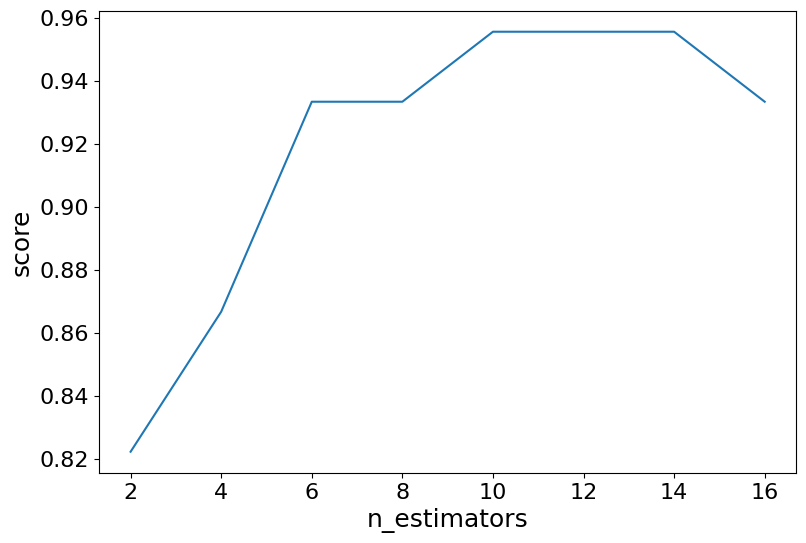

In [5]:
# Creating a Bagging Classifier:
# For bagging we need to set the parameter n_estimators, this is the number of base classifiers 
# that our model is going to aggregate together.

# For this sample dataset the number of estimators is relatively low, it is often the case that 
# much larger ranges are explored. Hyperparameter tuning is usually done with a grid search, but 
# for now we will use a select set of values for the number of estimators.

# We start by importing the necessary model.

from sklearn.ensemble import BaggingClassifier

# Now lets create a range of values that represent the number of estimators we want to use in each ensemble.

estimator_range = [2,4,6,8,10,12,14,16]

# To see how the Bagging Classifier performs with differing values of n_estimators we need a way to 
# iterate over the range of values and store the results from each ensemble. To do this we will create
# a for loop, storing the models and scores in separate lists for later vizualizations.

# Note: The default parameter for the base classifier in BaggingClassifier is the DicisionTreeClassifier
# therefore we do not need to set it when instantiating the bagging model.

models = []
scores = []

for n_estimators in estimator_range:

    # Create bagging classifier
    clf = BaggingClassifier(n_estimators = n_estimators, random_state = 22)

    # Fit the model
    clf.fit(X_train, y_train)

    # Append the model and score to their respective list
    models.append(clf)
    scores.append(accuracy_score(y_true = y_test, y_pred = clf.predict(X_test)))

# With the models and scores stored, we can now visualize the improvement in model performance.

import matplotlib.pyplot as plt

# Generate the plot of scores against number of estimators
plt.figure(figsize=(9,6))
plt.plot(estimator_range, scores)

# Adjust labels and font (to make visable)
plt.xlabel("n_estimators", fontsize = 18)
plt.ylabel("score", fontsize = 18)
plt.tick_params(labelsize = 16)

# Visualize plot
plt.show()

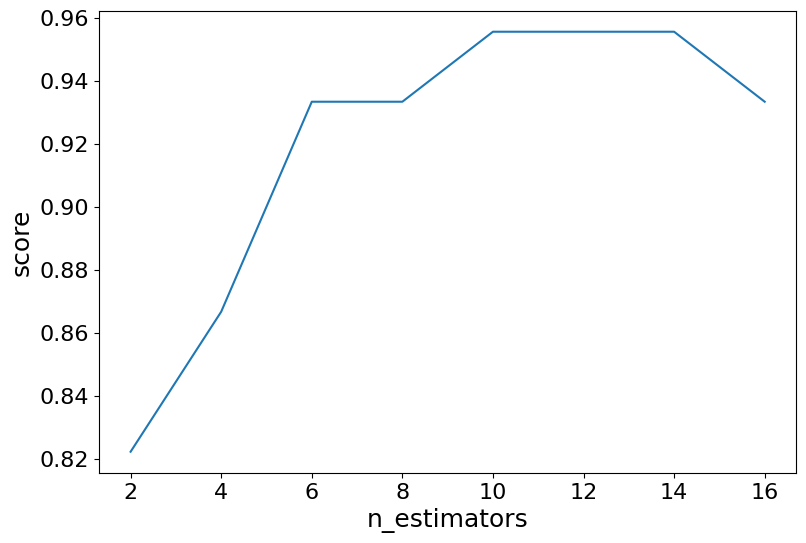

In [6]:
# Example:
# Import the necessary data and evaluate the BaggingClassifier performance.

import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier

data = datasets.load_wine(as_frame = True)

X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 22)

estimator_range = [2,4,6,8,10,12,14,16]

models = []
scores = []

for n_estimators in estimator_range:

    # Create bagging classifier
    clf = BaggingClassifier(n_estimators = n_estimators, random_state = 22)

    # Fit the model
    clf.fit(X_train, y_train)

    # Append the model and score to their respective list
    models.append(clf)
    scores.append(accuracy_score(y_true = y_test, y_pred = clf.predict(X_test)))

# Generate the plot of scores against number of estimators
plt.figure(figsize=(9,6))
plt.plot(estimator_range, scores)

# Adjust labels and font (to make visable)
plt.xlabel("n_estimators", fontsize = 18)
plt.ylabel("score", fontsize = 18)
plt.tick_params(labelsize = 16)

# Visualize plot
plt.show()

In [ ]:
# Results Explained:

# By iterating through different values for the number of estimators we can see an increase 
# in model performance from 82.2% to 95.5%. After 14 estimators the accuracy begins to drop, 
# again if you set a different random_state the values you see will vary. That is why it is 
# best practice to use cross validation to ensure stable results.

# In this case, we see a 13.3% increase in accuracy when it comes to identifying the type of the wine.

# Another Form of Evaluation:

# As bootstrapping chooses random subsets of observations to create classifiers, there are 
# observations that are left out in the selection process. These "out-of-bag" observations can 
# then be used to evaluate the model, similarly to that of a test set. Keep in mind, that 
# out-of-bag estimation can overestimate error in binary classification problems and should only 
# be used as a compliment to other metrics.

# We saw in the last exercise that 12 estimators yielded the highest accuracy, so we will use 
# that to create our model. This time setting the parameter oob_score to true to evaluate the 
# model with out-of-bag score.

In [7]:
# Example:
# Create a model with out-of-bag metric.

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier

data = datasets.load_wine(as_frame = True)

X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 22)

oob_model = BaggingClassifier(n_estimators = 12, oob_score = True,random_state = 22)

oob_model.fit(X_train, y_train)

print(oob_model.oob_score_)

0.9398496240601504


In [ ]:
# Since the samples used in OOB and the test set are different, and the dataset is relatively 
# small, there is a difference in the accuracy. It is rare that they would be exactly the same, 
# again OOB should be used quick means for estimating error, but is not the only evaluation metric.

In [ ]:
# Generating Decision Trees from Bagging Classifier:
# As was seen in the Decision Tree lesson, it is possible to graph the decision tree the model 
# created. It is also possible to see the individual decision trees that went into the aggregated 
# classifier. This helps us to gain a more intuitive understanding on how the bagging model arrives 
# at its predictions.

# Note: This is only functional with smaller datasets, where the trees are relatively shallow and 
# narrow making them easy to visualize.

# We will need to import plot_tree function from sklearn.tree. The different trees can be graphed 
# by changing the estimator you wish to visualize.

[Text(0.4583333333333333, 0.875, 'proline <= 727.5\ngini = 0.611\nsamples = 82\nvalue = [54, 60, 19]'),
 Text(0.25, 0.625, 'flavanoids <= 1.335\ngini = 0.339\nsamples = 47\nvalue = [0, 58, 16]'),
 Text(0.16666666666666666, 0.375, 'hue <= 0.92\ngini = 0.266\nsamples = 15\nvalue = [0, 3, 16]'),
 Text(0.08333333333333333, 0.125, 'gini = 0.0\nsamples = 13\nvalue = [0, 0, 16]'),
 Text(0.25, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 3, 0]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 32\nvalue = [0, 55, 0]'),
 Text(0.6666666666666666, 0.625, 'flavanoids <= 1.605\ngini = 0.159\nsamples = 35\nvalue = [54, 2, 3]'),
 Text(0.5, 0.375, 'color_intensity <= 4.325\ngini = 0.375\nsamples = 3\nvalue = [0, 1, 3]'),
 Text(0.4166666666666667, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.5833333333333334, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 3]'),
 Text(0.8333333333333334, 0.375, 'magnesium <= 147.0\ngini = 0.036\nsamples = 32\nvalue = [54, 1, 0]'),
 Text(0.75, 0

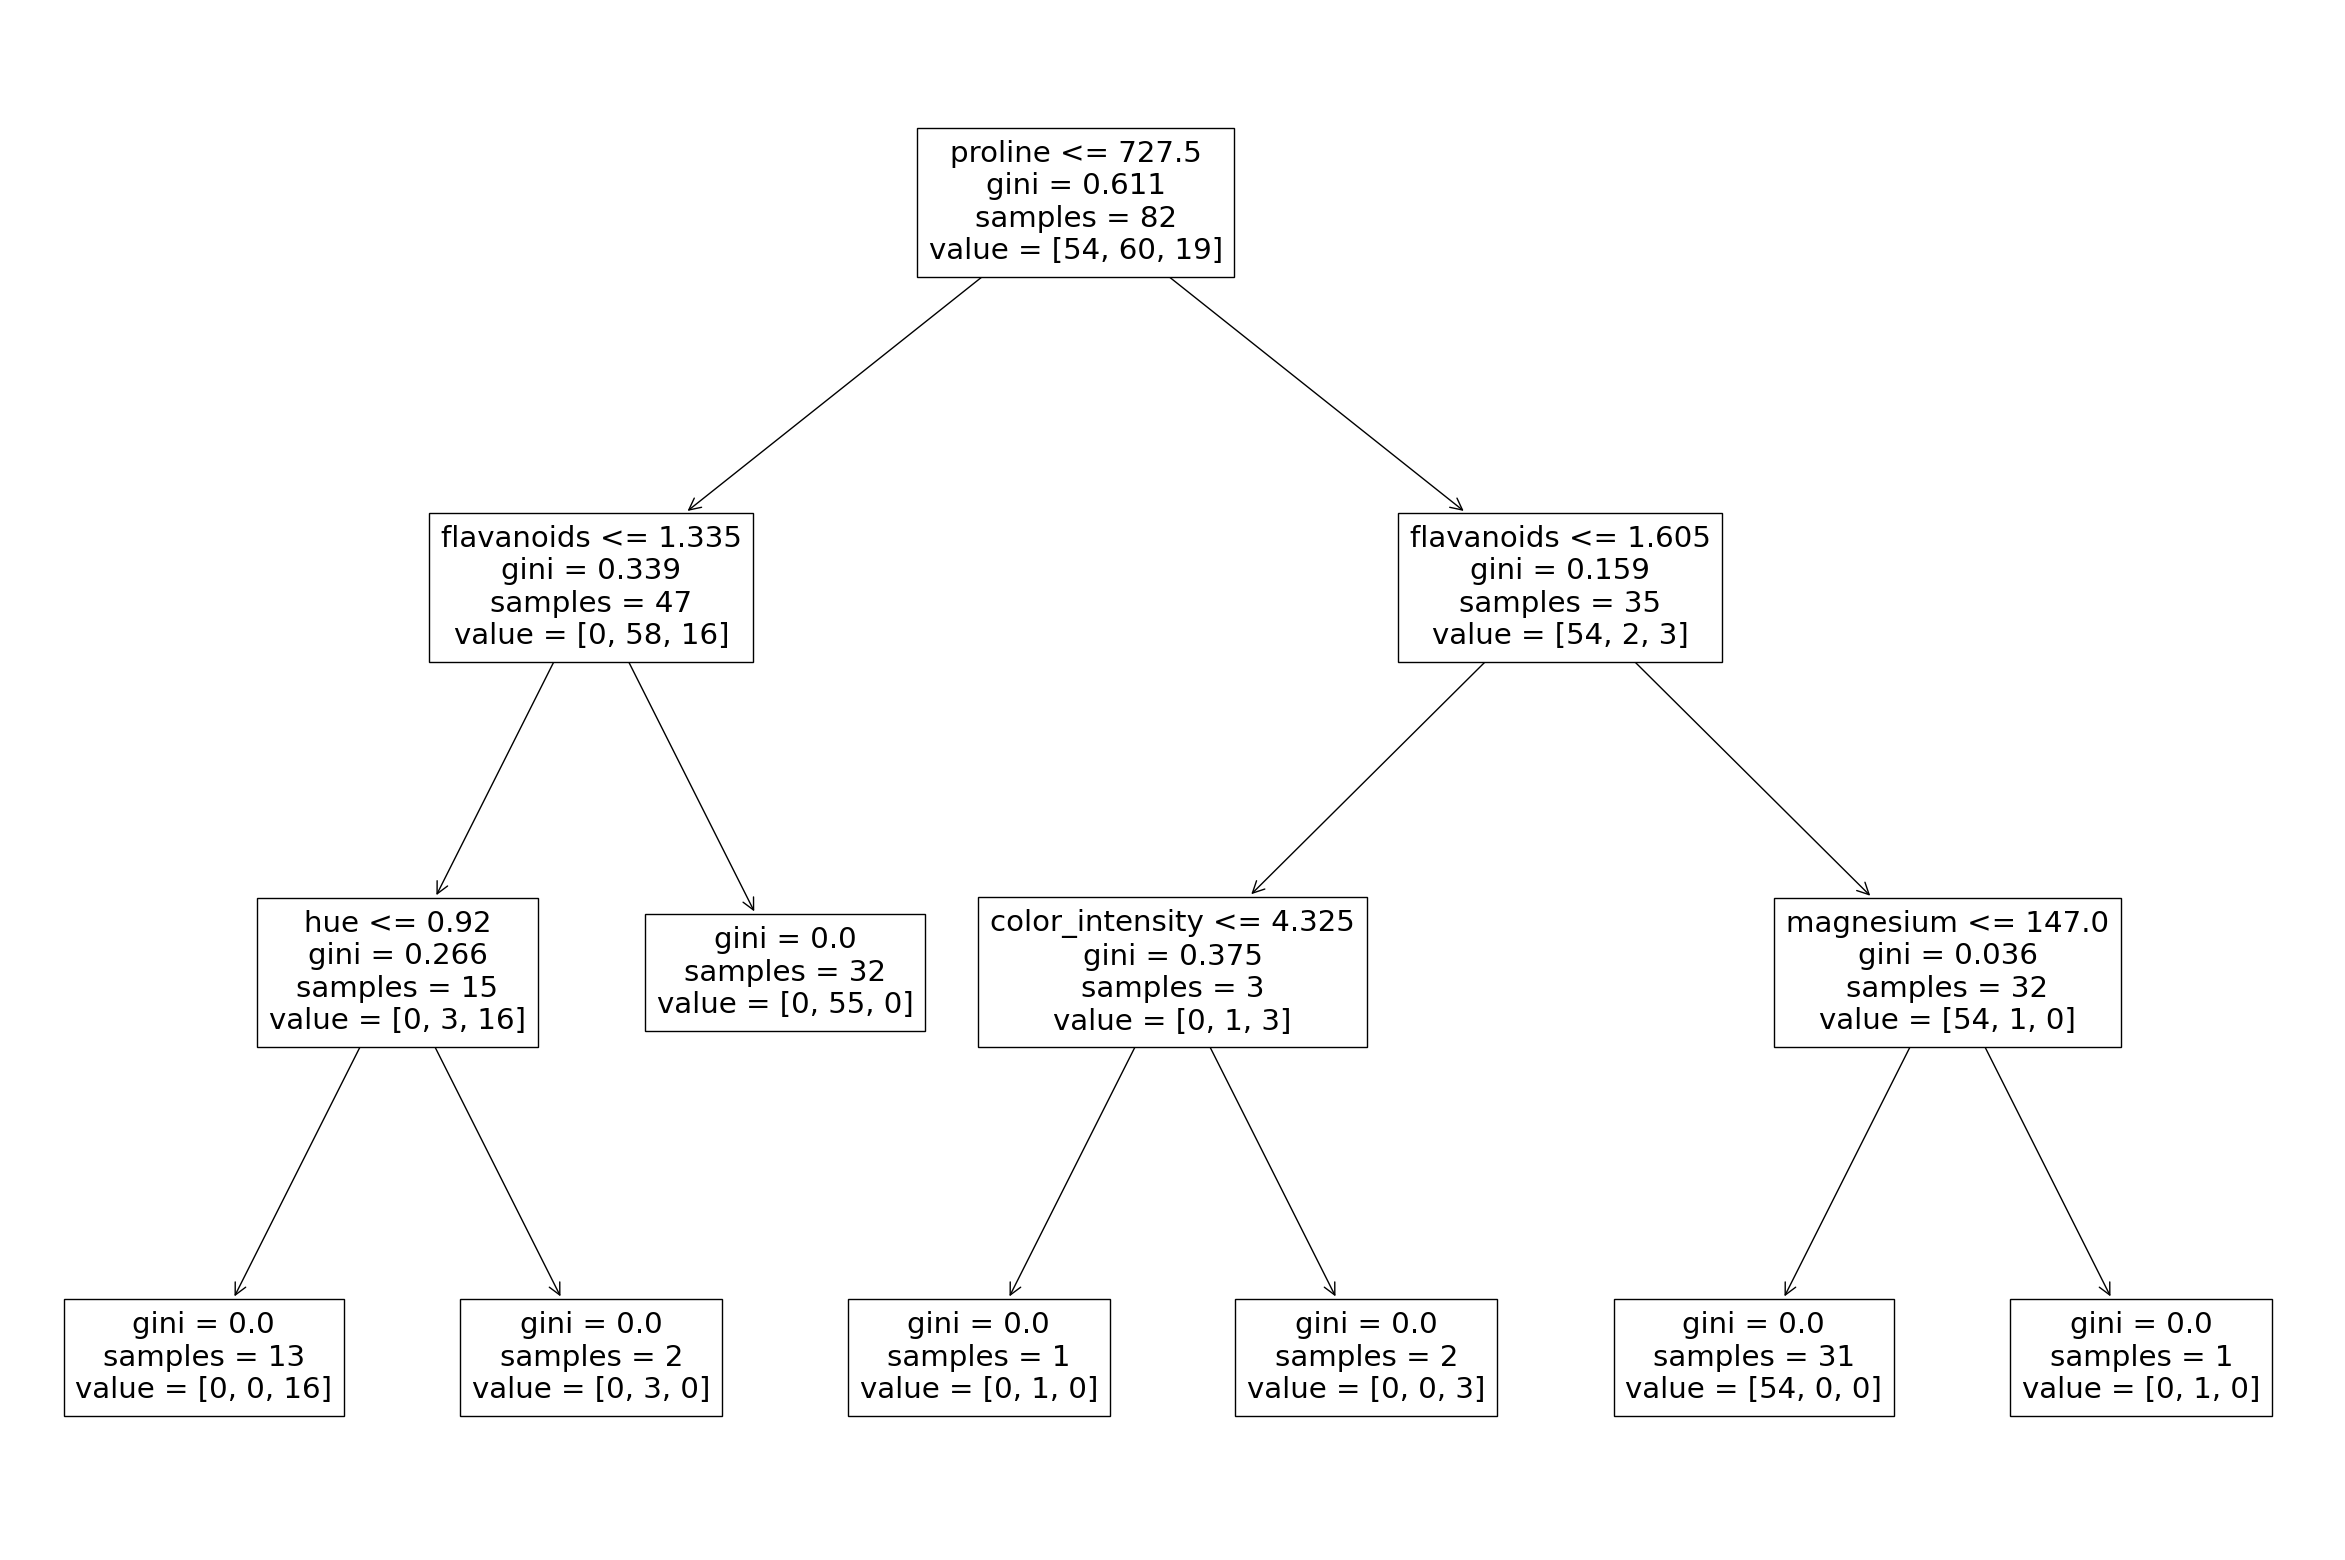

In [8]:
# Example:
# Generate Decision Trees from Bagging Classifier

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import plot_tree

X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 22)

clf = BaggingClassifier(n_estimators = 12, oob_score = True,random_state = 22)

clf.fit(X_train, y_train)

plt.figure(figsize=(30, 20))

plot_tree(clf.estimators_[0], feature_names = X.columns)

In [ ]:
# Here we can see just the first decision tree that was used to vote on the final prediction. 
# Again, by changing the index of the classifier you can see each of the trees that have been aggregated.